## DS4M Project Code

# **Exploring Visitor Trends in Portugal: A Data-Driven Perspective**
**Data Science for Marketing** |
Outomn Semester - 2024/2025



Student Number  | Student Name
-------------------|------------------
20240108| Catarina Sousa
20240125|Maria Rita Correia
20211619       | Mariana Takimura
20241482 | Tomás Gomes

> ⚠️ **Disclamer**: All insights are according to the respective extraction date

# Table of contents

1. [Preparing the Data](#preparing)
   
   1.1. [Importing Necessary Libraries](#importing)
   
   1.2. [Global Definitions](#global)
  
2. [Modeling](#model)

3.[Evaluation](#evalmuation)

  3.1 [General](#general)

  3.2. [By Segement Averages](#avg)

  * 3.2.1. [Active Users](#active)

  * 3.2.1. [Users at Risk](#risk)

  * 3.2.3. [Churned Users](#churned)



<a name="preparing"></a>

# 1. Prepararing the data

<a name="importing"></a>

## 1.1 Importing Necessary Libraries

In [1]:
!pip install squarify
!pip install category_encoders

In [2]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce

# Force widgets to be shown on notebook (may need permissions from the user)
#%matplotlib widget
#%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path_drive = "/content/drive/MyDrive/DS4M_PROJECT"
list_subfolders = os.listdir(path_drive)
list_subfolders

['Holidays.csv',
 'EuropeTop100Attractions_ENG.xlsx',
 'DS4M_GroupProject.ipynb',
 'World_Cities.xlsx',
 'Avaliações de Atrações Final.xlsx',
 'Reviews_Exported_v2.xlsx']

In [5]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

<a name="global"></a>

## 1.2 Global Definitions

In [6]:
ds = pd.read_excel('/content/drive/MyDrive/DS4M_PROJECT/Avaliações de Atrações Final.xlsx', engine='openpyxl')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82757 entries, 0 to 82756
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   localID               82757 non-null  object        
 1   globalRating          82757 non-null  float64       
 2   positionOnRanking     82757 non-null  int64         
 3   totalReviews          82757 non-null  int64         
 4   userName              82757 non-null  object        
 5   userContributions     82757 non-null  int64         
 6   tripType              82757 non-null  object        
 7   reviewVisited         82757 non-null  datetime64[ns]
 8   reviewRating          82757 non-null  int64         
 9   userCountryUntrieted  82757 non-null  object        
 10  timeDifferenceDays    82757 non-null  int64         
 11  visitedDuringHoliday  82757 non-null  int64         
 12  seasonVisited         82757 non-null  object        
 13  Name            

In [7]:
# Summary statistics for all variables
ds.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,82757,100,MAG001,7718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,82757.0,NaN,NaN,NaN,4.485137,4.0,4.5,4.5,4.5,5.0,0.17843
positionOnRanking,82757.0,NaN,NaN,NaN,3.897012,1.0,1.0,2.0,6.0,55.0,4.84306
totalReviews,82757.0,NaN,NaN,NaN,40903.428495,5179.0,14152.0,24454.0,51324.0,163828.0,43475.560881
userName,82757,63999,Malgorzata@Margo7850p,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,82757.0,NaN,NaN,NaN,410.147456,1.0,20.0,66.0,216.0,188465.0,3042.235608
tripType,82757,6,Couples,30160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewVisited,82757,NaN,NaN,NaN,2019-07-17 23:00:59.726669824,2015-10-01 00:00:00,2019-04-01 00:00:00,2019-07-01 00:00:00,2019-10-01 00:00:00,2021-08-01 00:00:00,NaN
reviewRating,82757.0,NaN,NaN,NaN,4.580144,1.0,4.0,5.0,5.0,5.0,0.78986
userCountryUntrieted,82757,169,Uk,24741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a name="*model*"></a>


# 2. Modeling

We aim to aggregate and transform the `ds` DataFrame into a new DataFrame called `RFM`. This new DataFrame will summarize key information for each user, including the recency of their reviews, the frequency (total number of reviews), and the average review rating. By doing so, we will pre-process the data to provide a concise and structured summary that can be used effectively in subsequent analyses.

In [8]:
# Confirm reviewVisited to datetime dataType
ds['reviewVisited'] = pd.to_datetime(ds['reviewVisited'], errors='coerce')

# Drop rows with missing or invalid data (confirmation)
ds = ds.dropna(subset=['reviewVisited', 'localID', 'reviewRating', 'userName'])

In [9]:
# Determine the most recent review date in the dataset
dateMax = ds['reviewVisited'].max()

# Compute RFM metrics
RFM = ds.groupby('userName').agg(
    Recency=('reviewVisited', lambda date: (dateMax - date.max()).days),
    Frequency=('localID', 'count'),  # Count unique attractions visited
    Monetary=('reviewRating', 'mean')  # Average review rating
).fillna(0)

In [10]:
RFM.head(5)

,Recency,Frequency,Monetary
userName,,,
#1 Best@Number1Best,1096,1,5.0
#Ciccone@932emzc,365,2,4.0
#Travelendlessbeauty@travelendlessbeauty,792,1,5.0
#moving mountains@peaceat28,670,2,4.5
#taxi de Barcelona #taxi#aeropuer@cavataxi,365,1,5.0


This summarized data provides insights into users' review behaviors, including their review frequency, recency, and average ratings. It can help identify highly active users, analyze rating trends, or segment users based on their reviewing patterns.

In [11]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
table = RFM[cols].describe()
table

,Recency,Frequency,Monetary
count,63999.000000,63999.000000,63999.000000
mean,735.172284,1.293098,4.571305
std,187.659905,0.810376,0.794341
min,0.000000,1.000000,1.000000
25%,670.000000,1.000000,4.000000
50%,762.000000,1.000000,5.000000
75%,853.000000,1.000000,5.000000
max,1704.000000,28.000000,5.000000


We tried two approaches for the RFMScore function, but chose to go forward with the second

**Recency**:
- 0-548 days: score 1 (1 year, 6 months and 3 days)
- 548-853 days: score 2 (1 year, 6 months and 3 days - 2 years, 4 months and 3 days)
- 853-1095 days: score 3 (2 years, 4 months and 3 days - 3 years)
- 1095-1704 days: score 4 (3 years - 4 years, 8 months and 4 days)

**Frequency**:
- 0-1 locals: score 1
- 1-2 locals: score 2
- 2-3 locacls: score 3
- 3-28 locals: score 4

**Monetary**:
- 0-2 review ratings: score 1
- 2-3 review ratings: score 2
- 3-4 review ratings:score 3
- 4-5 review ratings: score 4

This bins were choosen according to the *.describe()* method showed in the cell above.

In [12]:
# Define a function to calculate RFM scores
def RFMScore(x, col):
    if x <= col.quantile(0.25):
        return '1'
    elif x <= col.quantile(0.5):
        return '2'
    elif x <= col.quantile(0.75):
        return '3'
    else:
        return '4'

# Apply the scoring function to each metric
#RFM['RScore'] = RFM['Recency'].apply(RFMScore, col=RFM['Recency'])
#RFM['FScore'] = RFM['Frequency'].apply(RFMScore, col=RFM['Frequency'])
#RFM['MScore'] = RFM['Monetary'].apply(RFMScore, col=RFM['Monetary'])

# Process
#<1.5 years, ~2.3 years, ~3 years, and >3 years]
RFM['RScore'] = pd.cut(RFM['Recency'], bins=[0, 548, 853, 1095, float('inf')], labels=[1, 2, 3, 4])
RFM['FScore'] = pd.cut(RFM['Frequency'], bins=[0, 1, 2, 3, float('inf')], labels=[1, 2, 3, 4])
RFM['MScore'] = pd.cut(RFM['Monetary'], bins=[0, 2, 3, 4, float('inf')], labels=[1, 2, 3, 4])


In [13]:
RFM.head(5)

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
#1 Best@Number1Best,1096,1,5.0,4,1,4
#Ciccone@932emzc,365,2,4.0,1,2,3
#Travelendlessbeauty@travelendlessbeauty,792,1,5.0,2,1,4
#moving mountains@peaceat28,670,2,4.5,2,2,4
#taxi de Barcelona #taxi#aeropuer@cavataxi,365,1,5.0,1,1,4


To better visualize we combined the RFMScores to have a string of numbers.

In [14]:
# Create a column with full RMF score and sort the results
# Transform to string
cols = ['RScore','FScore','MScore']
RFM[cols] = RFM[cols].astype(str)

# Combine scores into a single RFM score
RFM['RFMScore'] = RFM['RScore'] + RFM['FScore'] + RFM['MScore']
RFM = RFM.sort_values(by=['RFMScore'])
RFM.head(5)

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
Abbie H@abbieh396,61,1,1.0,1,1,1,111
Eddy@HelloSexyChef,547,1,2.0,1,1,1,111
Lucy L@593lucyl,365,1,2.0,1,1,1,111
Sam Ó hAtháirne@MarxyWarxy,304,1,1.0,1,1,1,111
AnOxfordCouple@AnOxfordCouple,365,1,2.0,1,1,1,111


In [15]:
# Show first 5 customers
RFM.tail(5)

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
TeamWard@TeamWard,0,6,5.000000,nan,4,4,nan44
Derek S@CaptainCookieDaddy,0,7,4.857143,nan,4,4,nan44
Chris318i@Chris318i,0,4,5.000000,nan,4,4,nan44
TurinTraveller@TurinTraveller,0,4,4.750000,nan,4,4,nan44
Travellingdoc@nolanar,0,4,5.000000,nan,4,4,nan44


There is a point in the previous result that requires clarification: the presence of NaN (unavailable) values occurred because there were no records in Dataset RFM corresponding to these specific RFM segments.

In the previous code, the full RFM scores were calculated and used as a key to group the data in Dataset RFM. Each RFM segment represents a specific combination of recency, frequency, and monetary value. However, there is no guarantee that all possible combinations of RFM scores are present in the data.

For example, rows that have 'nan23', 'nan24', 'nan33', 'nan34', 'nan44' as values in 'RFMScore' may indicate that there were no records in Dataset RFM that corresponded to these specific RFM segments. In other words, there were no records where the combination of Recency, Frequency, and Monetary exactly matched these values.

When using the groupby() method to group data based on the values in RFMScore, Pandas creates groups for all unique values in the RFMScore column. If there are no entries matching a given RFMScore value, Pandas will create the group, but the aggregated statistic result for that group will be NaN because there is no data to calculate the statistic.

Therefore, the presence of NaNs in the results indicates that there was not enough data to calculate statistics for those specific RFM segments because there were no entries corresponding to those segments in Dataset RFM.

<a name="evaluation"></a>

# 3. Evaluation

<a name="*general*"></a>

### 3.1 General

In [16]:
# Group by RFM score and compute statistics
RFMStats = RFM.reset_index().groupby('RFMScore').agg(
    NrCustomers=('userName', lambda i: len(i.unique())),
    avgRecency=('Recency', 'mean'),
    avgFrequency=('Frequency', 'mean'),
    avgMonetary=('Monetary', 'mean')
).fillna(0)

# Sort by RFMScore for clarity
RFMStats = RFMStats.sort_values(by='RFMScore')

144 - ideal 'customer', recently travelled, hight number of places visited and hight review ratting.

In [17]:
RFM[RFM['RFMScore']=='144']

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
Katalin Győrfi@KatalinGyorfi,396,5,5.000000,1,4,4,144
Chris White Shark@Chris_Whiteshark,334,4,4.750000,1,4,4,144
IAN D@ian_dempster,304,7,4.428571,1,4,4,144
Louisetc@Louisetc,334,4,4.750000,1,4,4,144
Swedishtomcat@Swedishtomcat,304,6,4.666667,1,4,4,144
...,...,...,...,...,...,...,...
amsterdam05@amsterdam05,518,4,4.750000,1,4,4,144
Nibbs007@Nibbs007,547,5,5.000000,1,4,4,144
Lesterbeach@Lesterbeach,547,7,4.571429,1,4,4,144


124 - recently visited, moderate locals visited, hight rating for the place visited.

In [18]:
RFM[RFM['RFMScore']=='124']

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
Gian Luca B@858gianlucab,365,2,4.5,1,2,4,124
Lydia V@888lydiav,61,2,5.0,1,2,4,124
OneEyedGuide@OneEyedGuide,334,2,5.0,1,2,4,124
Holiday-Lady25@Holiday-Lady25,61,2,4.5,1,2,4,124
Paige0812@Paige0812,396,2,5.0,1,2,4,124
...,...,...,...,...,...,...,...
David H@M1356QBdavidh,518,2,5.0,1,2,4,124
Philippe B@18philippeb,547,2,5.0,1,2,4,124
tinkle_24@tinkle_24,334,2,4.5,1,2,4,124


Text(0.5, 0.98, 'RFM histograms')

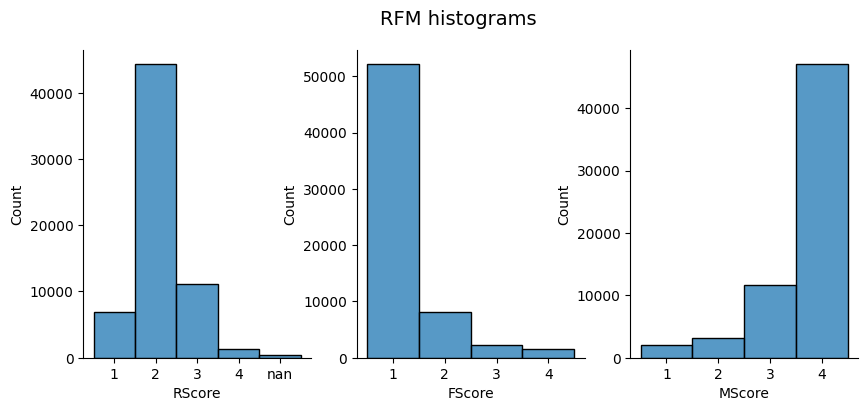

In [19]:
# Draw
fig, ax = plt.subplots(1, 3, figsize=(10,4))
for var, subplot in zip(RFM[cols], ax.flatten()):
    g = sns.histplot(data=RFM,
                bins=10,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms", fontsize=plots_Title_fontSize)

>From the histograms we can see that most ' customers' fall into the 214 RFM, this means that they recently travelled they don't have many reviews from the places they visited (did not visit many places) but gave the place hight rating scores.

<ipython-input-20-1b7355c3b4c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFMScore', y='NrCustomers', data=RFMStats, palette='viridis')


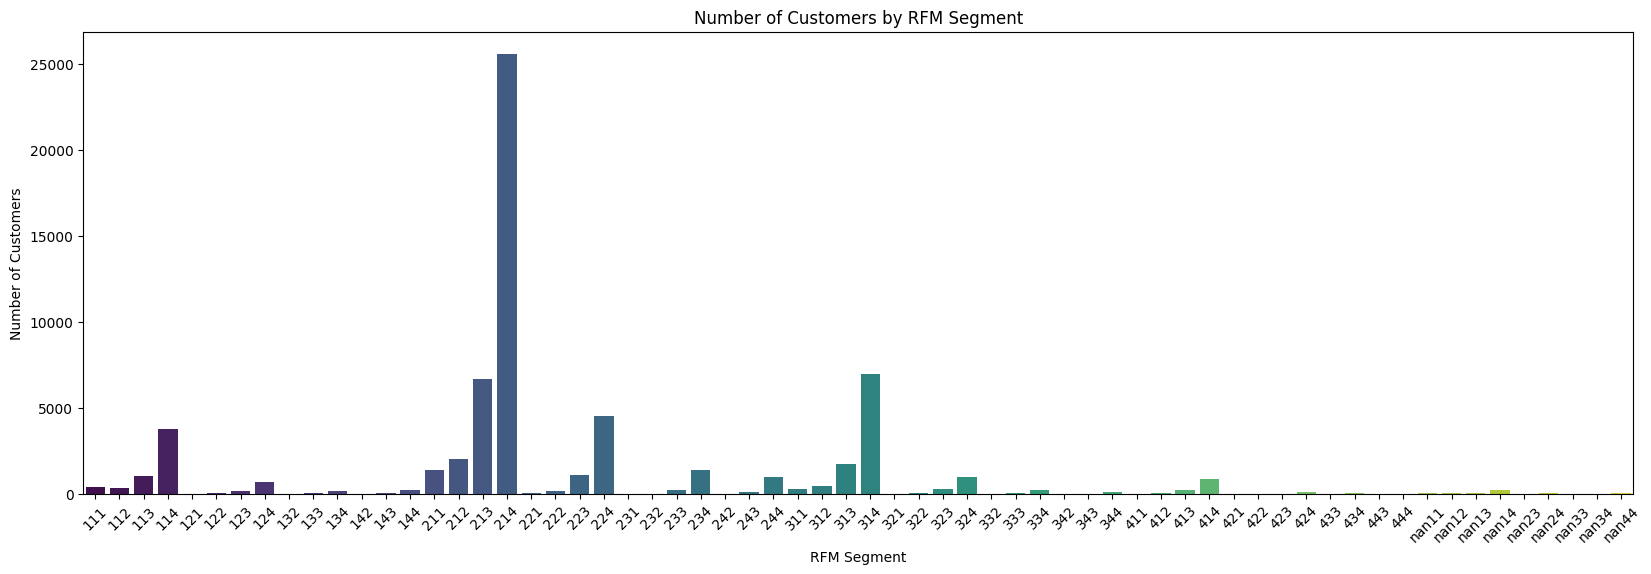

In [20]:
# Bar plot of RFM segments by number of customers
plt.figure(figsize=(20, 6))
sns.barplot(x='RFMScore', y='NrCustomers', data=RFMStats, palette='viridis')
plt.title('Number of Customers by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


> - **214** - customers that traveled somewhat recently (548-853 days ~1 year and half - 2 years and half), but only for 1 location and their review rating of the local was 4-5 stars.
- **314** - customers that traveled between 3 years and almost 5 years ago, for 1 location and gave a review ratting of 4 or 5 stars.
- **213** - customers that traveled between 1 year, 6 months and 3 days and 2 years, 4 months and 3 days, for 1 destination and gave 3 or 4 stars.
- **224** - customers that traveled between 1 year, 6 months and 3 days and 2 years, 4 months and 3 days, and gave 4 to 5 stars to the location.
- **114** - customers that traveled very recently (within a year and a half), visisted only 1 location and gave a very hight rating.

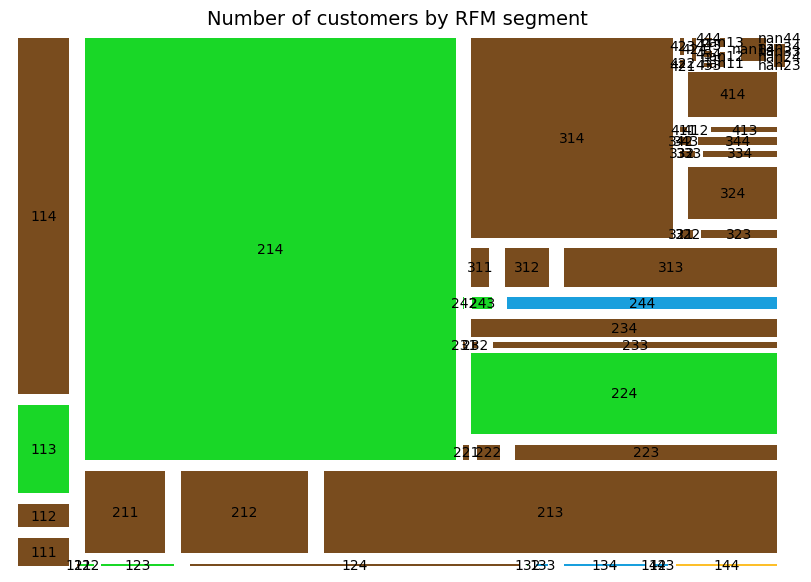

In [21]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm=='144'):
        hex='#FDB813'   # Platinium # amarelo
    elif (rfm in ['143','133','134','142','244']):
        hex='#0095DA'   # Gold #azul
    elif (rfm in ['243','141','131','132','122','123','113','242','214','224']):
        hex='#00D30F'   # Silver # verde
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['NrCustomers'],
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)

# Decoration
plt.title("Number of customers by RFM segment",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()

In [22]:
%matplotlib inline

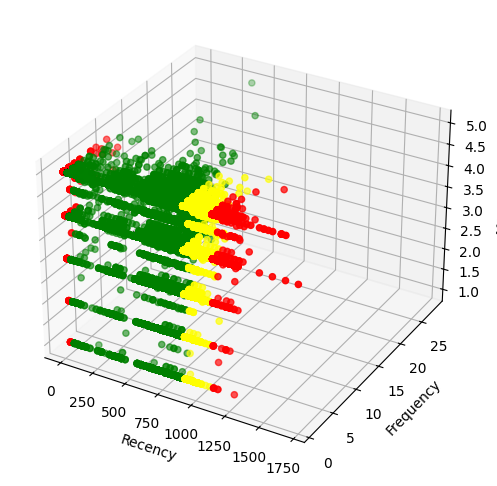

In [23]:
# Interactive 3D scatter plot of each customer's RFM values
%matplotlib inline

# Draw
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection = '3d')

# Decoration
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

# Define color according to Recency (1 and 2:Green, 3:Yellow, 4:Red)
color = ['green' if RFM[0]<'3' else ('yellow' if RFM[0]=='3' else 'red') for RFM in RFM['RFMScore']]

# Plot
ax.scatter(RFM['Recency'], RFM['Frequency'], RFM['Monetary'], c=color)
plt.show()

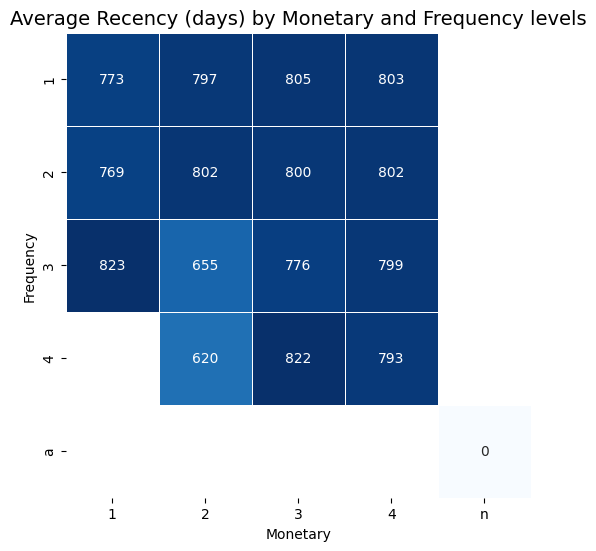

In [24]:
# RFM Heatmap

# Prepare data
tempDF = RFMStats
tempDF['Frequency'] = tempDF.index.str[1]
tempDF['Monetary'] = tempDF.index.str[2]
pt = pd.pivot_table(tempDF, values='avgRecency',
                     index=['Frequency'],
                     columns='Monetary')

# Draw
fig , ax = plt.subplots(figsize=(6, 8))
heatmap = sns.heatmap(pt,
                      square = True,
                      linewidths = .5,
                      cmap = 'Blues',
                      cbar=False,
                      fmt='.0f',
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize+2})

# Decoration
plt.title("Average Recency (days) by Monetary and Frequency levels", fontsize=plots_Title_fontSize)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<a name="*avg*"></a>

## 3.2 By Segment Averages

In [25]:
# Copy the remaining variables to the modeling dataset (in this case is only the country)
cols = ['userName','Country']
RFM = RFM.merge(ds[cols], how='left', left_index=True, right_on='userName').drop(columns='userName')

In [26]:
# Encode categorical variables to dummy variables
# For more information the different methods to enconde categorical variables check https://contrib.scikit-learn.org/category_encoders/
cols = ['Country']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
RFM = ce_one_hot.fit_transform(RFM)

In [27]:
# Create a copy of the dataset just with the columns to analyze
X_analysis = RFM.drop(columns=['RScore','FScore','MScore','RFMScore'])

In [28]:
# Check the mean values of each segment
segmentsMeanDF = pd.DataFrame(X_analysis.groupby(RFM['RFMScore'].values).mean())
segmentsMeanDF.T

,111,112,113,114,121,122,123,124,132,133,...,444,nan11,nan12,nan13,nan14,nan23,nan24,nan33,nan34,nan44
Recency,299.469849,366.534483,380.916830,384.952773,334.333333,407.703704,364.388571,395.218978,289.500000,323.981818,...,1167.696203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
Frequency,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,5.860759,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,7.336
Monetary,1.474874,3.000000,4.000000,5.000000,1.416667,2.907407,3.842857,4.827007,3.000000,3.860606,...,4.797468,1.476190,3.000000,4.000000,5.000000,3.857143,4.833333,4.000000,4.833333,4.752
Country_SCOTLAND,0.125628,0.189655,0.128180,0.079331,0.166667,0.092593,0.088571,0.081752,0.000000,0.109091,...,0.025316,0.190476,0.153846,0.112903,0.074419,0.000000,0.027778,0.000000,0.250000,0.072
Country_SPAIN,0.103015,0.097701,0.118395,0.141682,0.000000,0.148148,0.191429,0.208759,0.166667,0.157576,...,0.278481,0.190476,0.076923,0.032258,0.097674,0.214286,0.055556,0.222222,0.166667,0.088
Country_ENGLAND,0.530151,0.456897,0.410959,0.368533,0.500000,0.314815,0.351429,0.265693,0.000000,0.327273,...,0.215190,0.285714,0.576923,0.661290,0.669767,0.571429,0.527778,0.333333,0.194444,0.200
Country_PORTUGAL,0.047739,0.066092,0.049902,0.039533,0.000000,0.074074,0.122857,0.084672,0.000000,0.103030,...,0.012658,0.000000,0.076923,0.016129,0.009302,0.000000,0.083333,0.000000,0.027778,0.096
Country_FRANCE,0.060302,0.025862,0.041096,0.030512,0.000000,0.074074,0.031429,0.043066,0.000000,0.048485,...,0.101266,0.047619,0.038462,0.032258,0.018605,0.000000,0.111111,0.000000,0.027778,0.016
Country_BELGIUM,0.005025,0.011494,0.012720,0.022552,0.000000,0.000000,0.017143,0.024088,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004651,0.071429,0.027778,0.000000,0.000000,0.016
Country_GREECE,0.010050,0.014368,0.030333,0.047758,0.000000,0.018519,0.008571,0.022628,0.000000,0.006061,...,0.012658,0.000000,0.000000,0.000000,0.027907,0.000000,0.027778,0.000000,0.027778,0.064


In [29]:
# Analyze one segment in specific
segmentsMeanDF.loc['144']

,144
Recency,348.513899
Frequency,7.037566
Monetary,4.719008
Country_SCOTLAND,0.051841
Country_SPAIN,0.250939
Country_ENGLAND,0.153268
Country_PORTUGAL,0.117205
Country_FRANCE,0.046582
Country_BELGIUM,0.021037
Country_GREECE,0.017280


<a name="*active*"></a>


### 3.2.1 Active Users

Active User Segments Based on RFM Scores:

| **Recency (R)** | **Frequency (F)** | **Monetary (M)** | **Segment Description**                                 |
|-----------------|-------------------|------------------|--------------------------------------------------------|
| 1|
| 2               | 1                 | 4                | Low Frequency, High Value Customers (Moderately recent, but highly engaged in terms of ratings) |
| 3               | 1                 | 4                | Longer Term, High Value Customers (Less recent, high value ratings) |
| 2               | 1                 | 3                | Moderate Recency, High Ratings, Low Frequency          |


In [30]:
active_users = ['111','112','121','122','131','132','141','142','211','212','221','222','231','232','241','242']
filtered_rfmscores1 = RFMStats[RFMStats.index.isin(active_users)]
filtered_rfmscores1

,NrCustomers,avgRecency,avgFrequency,avgMonetary,Frequency,Monetary
RFMScore,,,,,,
111,398,299.469849,1.000000,1.474874,1,1
112,348,366.534483,1.000000,3.000000,1,2
121,6,334.333333,2.000000,1.416667,2,1
122,27,407.703704,2.000000,2.907407,2,2
132,2,289.500000,3.000000,3.000000,3,2
142,3,233.333333,4.666667,2.944444,4,2
211,1373,736.766205,1.000000,1.506919,1,1
212,2047,739.479238,1.000000,3.000000,1,2
221,23,745.695652,2.000000,1.543478,2,1


<a name="*risk*"></a>


### 3.2.2 Users at Risk

In [31]:
risk_users = ['311','312','321','322','331','332','341','342']
filtered_rfmscores2 = RFMStats[RFMStats.index.isin(risk_users)]
filtered_rfmscores2

,NrCustomers,avgRecency,avgFrequency,avgMonetary,Frequency,Monetary
RFMScore,,,,,,
311,251,921.039841,1.0,1.545817,1,1
312,443,928.532731,1.0,3.000000,1,2
321,5,901.400000,2.0,1.700000,2,1
322,32,914.093750,2.0,2.906250,2,2
332,7,939.142857,3.0,2.809524,3,2
342,1,943.000000,4.0,2.750000,4,2


<a name="*churned*"></a>


### 3.2.3 Churned users

In [32]:
risk_users = ['411','412','421','422','431','432','441','442']
filtered_rfmscores3 = RFMStats[RFMStats.index.isin(risk_users)]
filtered_rfmscores3

,NrCustomers,avgRecency,avgFrequency,avgMonetary,Frequency,Monetary
RFMScore,,,,,,
411,17,1135.647059,1.0,1.588235,1,1
412,37,1153.054054,1.0,3.000000,1,2
421,1,1096.000000,2.0,1.500000,2,1
422,3,1147.000000,2.0,3.000000,2,2


In [33]:
sum_of_Active = filtered_rfmscores1['NrCustomers'].sum()
sum_of_at_risk = filtered_rfmscores2['NrCustomers'].sum()
sum_of_Churned = filtered_rfmscores3['NrCustomers'].sum()

print(f"Active users: {sum_of_Active}")
print(f"Users at risk: {sum_of_at_risk}")
print(f"Churned users: {sum_of_Churned}")

Active users: 4397
Users at risk: 739
Churned users: 58


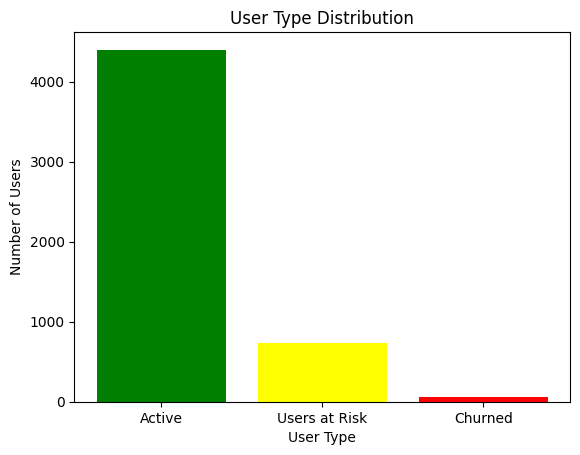

In [34]:
user_types = ['Active', 'Users at Risk', 'Churned']
user_counts = [sum_of_Active, sum_of_at_risk, sum_of_Churned]

plt.bar(user_types, user_counts, color=['green', 'yellow', 'red'])
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('User Type Distribution')
plt.show()